# Regression

 - 선형회귀란? 종속변수와 하나 이상의 설명변수(독립변수)간의 관계를 모델링하는 선형접근법

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 키와 몸무게

heights = [[1.6], [1.65], [1.7], [1.77], [1.85]]
weights = [[60], [65], [70], [77], [85]]

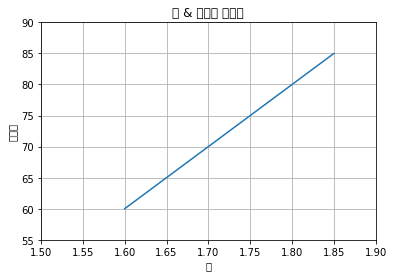

In [4]:
plt.title('키 & 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.axis([1.5, 1.90, 55, 90])
plt.grid()

plt.plot(heights, weights)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr_model = LinearRegression()

# fit 함수는 리스트 또는 배열 형태의 인수를 필요로 한다.
lr_model.fit(heights, weights)

LinearRegression()

In [7]:
weight_pred = lr_model.predict([[1.7], [1.75]])
weight_pred

array([[70.],
       [75.]])

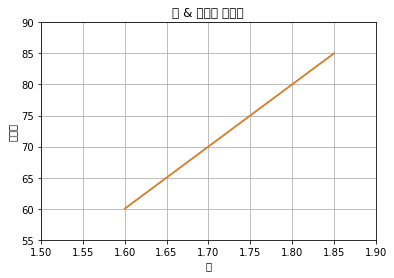

In [8]:
plt.title('키 & 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.axis([1.5, 1.90, 55, 90])
plt.grid()


# 
plt.plot(heights, weights)

# 선형 회귀선 그리기
plt.plot(heights, lr_model.predict(heights))

plt.show()

##### `auto-mpg.csv`를 이용한 선형회귀

In [9]:
import pandas as pd
import numpy as np

In [10]:
row_data = pd.read_csv('./실습데이터/auto-mpg.csv', header=None)

In [11]:
row_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [12]:
row_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
copy_df = row_data.copy()

In [14]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
copy_df.shape

(398, 9)

In [16]:
copy_df.isnull().apply(sum, axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

##### `horsepower`칼럼 이 문자형이다. 숫자형으로 바꾸어보자

 - 데이터에 `?`로 입력되어있는 값이 있다.

In [17]:
copy_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

 - `?`로 입력되어있는 값을 결측치로 바꾸자

In [18]:
copy_df.loc[copy_df['horsepower'] == '?', 'horsepower'] = np.nan

# replace함수로도 위와 같은 결과를 반환한다
# copy_df['horespower'].replace('?', np.non, inplace=True)

 - 문자형을 수치형으로 바꾸자

In [19]:
copy_df['horsepower'] = copy_df['horsepower'].astype(float)

 - `horsepower`에 결측치가 있는 행을 제거하자

In [20]:
copy_df = copy_df.dropna(subset=['horsepower'], # horsepower 칼럼에만 존재하는 NaN값의 행만 제거하겠다.
                         axis=0, 
                         inplace=False)

In [21]:
copy_df.shape

(392, 9)

In [22]:
# 분석에 활용할 독립변수를 선택

In [23]:
cor_df = copy_df[['mpg', 'cylinders', 'horsepower', 'weight']]

<AxesSubplot:xlabel='weight', ylabel='mpg'>

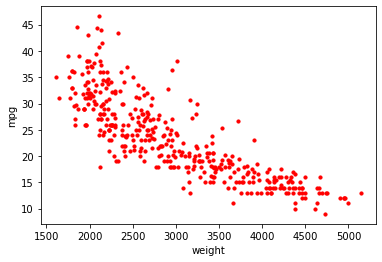

In [27]:
# 선형관계 파악을 위한 산점도 그래프

# mpg - weight
cor_df.plot(kind='scatter', x='weight', y='mpg', c='red', s=10)

<AxesSubplot:xlabel='weight', ylabel='horsepower'>

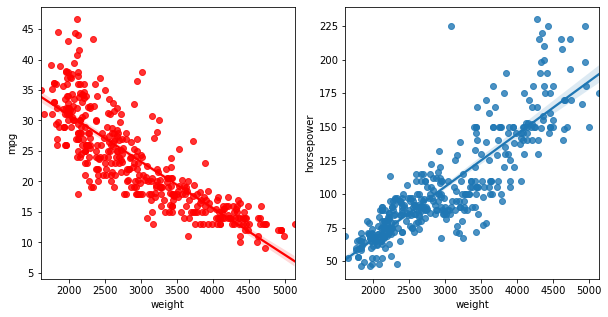

In [38]:
# seaborn 산점도

fig = plt.figure(figsize=(10, 5))

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

sns.regplot(x='weight', y='mpg', data=cor_df, ax=area01, color='red')
sns.regplot(x='weight', y='horsepower', data=cor_df, ax=area02)

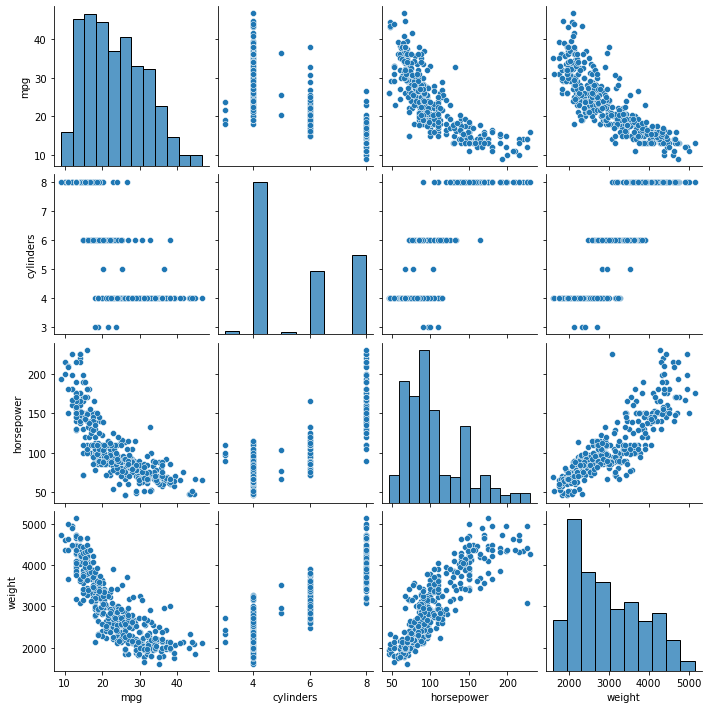

In [34]:
sns.pairplot(cor_df)

## 1. 선형회귀

   - 독립변수를 하나로 하여 선형회귀를 진행해보자

In [39]:
X = cor_df[['weight']]
y = cor_df['mpg']

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size    = 0.2,
                                                    random_state = 10)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import 

In [49]:
# 선형회귀 학습
auto_lr_model = LinearRegression()
auto_lr_model.fit(X_train, y_train)

3.2205543723826104